# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv("data/advertising.csv")

# 1. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


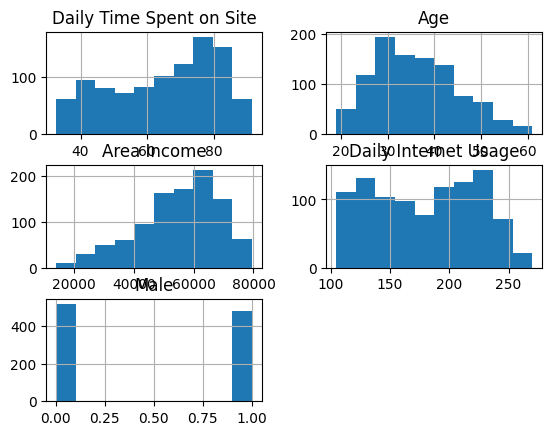

In [7]:
df.drop('Clicked on Ad', axis=1).hist()
plt.show()

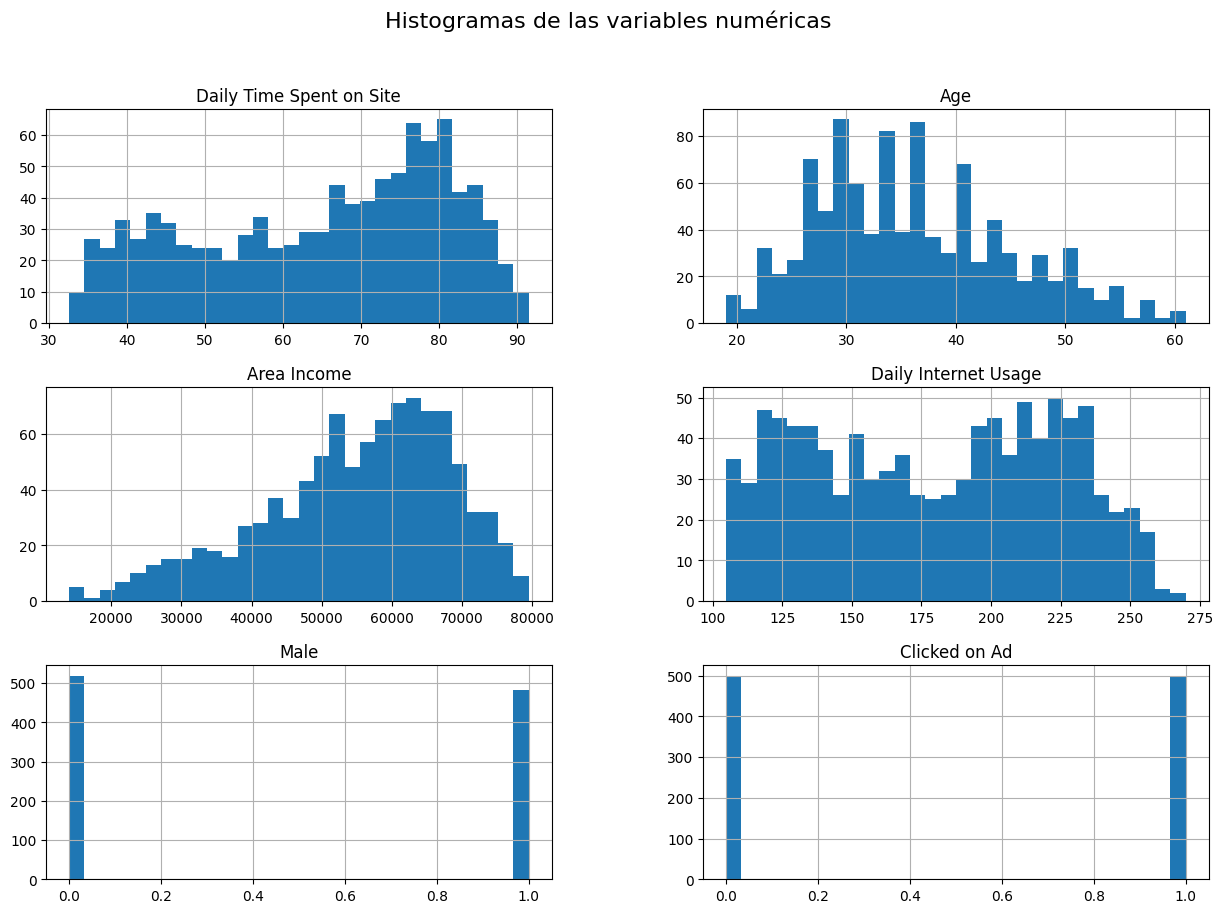

In [8]:
# Eliminar la columna 'Clicked on Ad'
df_numeric = df#.drop('Clicked on Ad', axis=1)

# Crear histogramas para cada columna numérica
df_numeric.hist(bins=30, figsize=(15, 10), layout=(3, 2))  # Ajusta el layout según el número de columnas

# Mostrar el gráfico
plt.suptitle('Histogramas de las variables numéricas', fontsize=16)
plt.show()

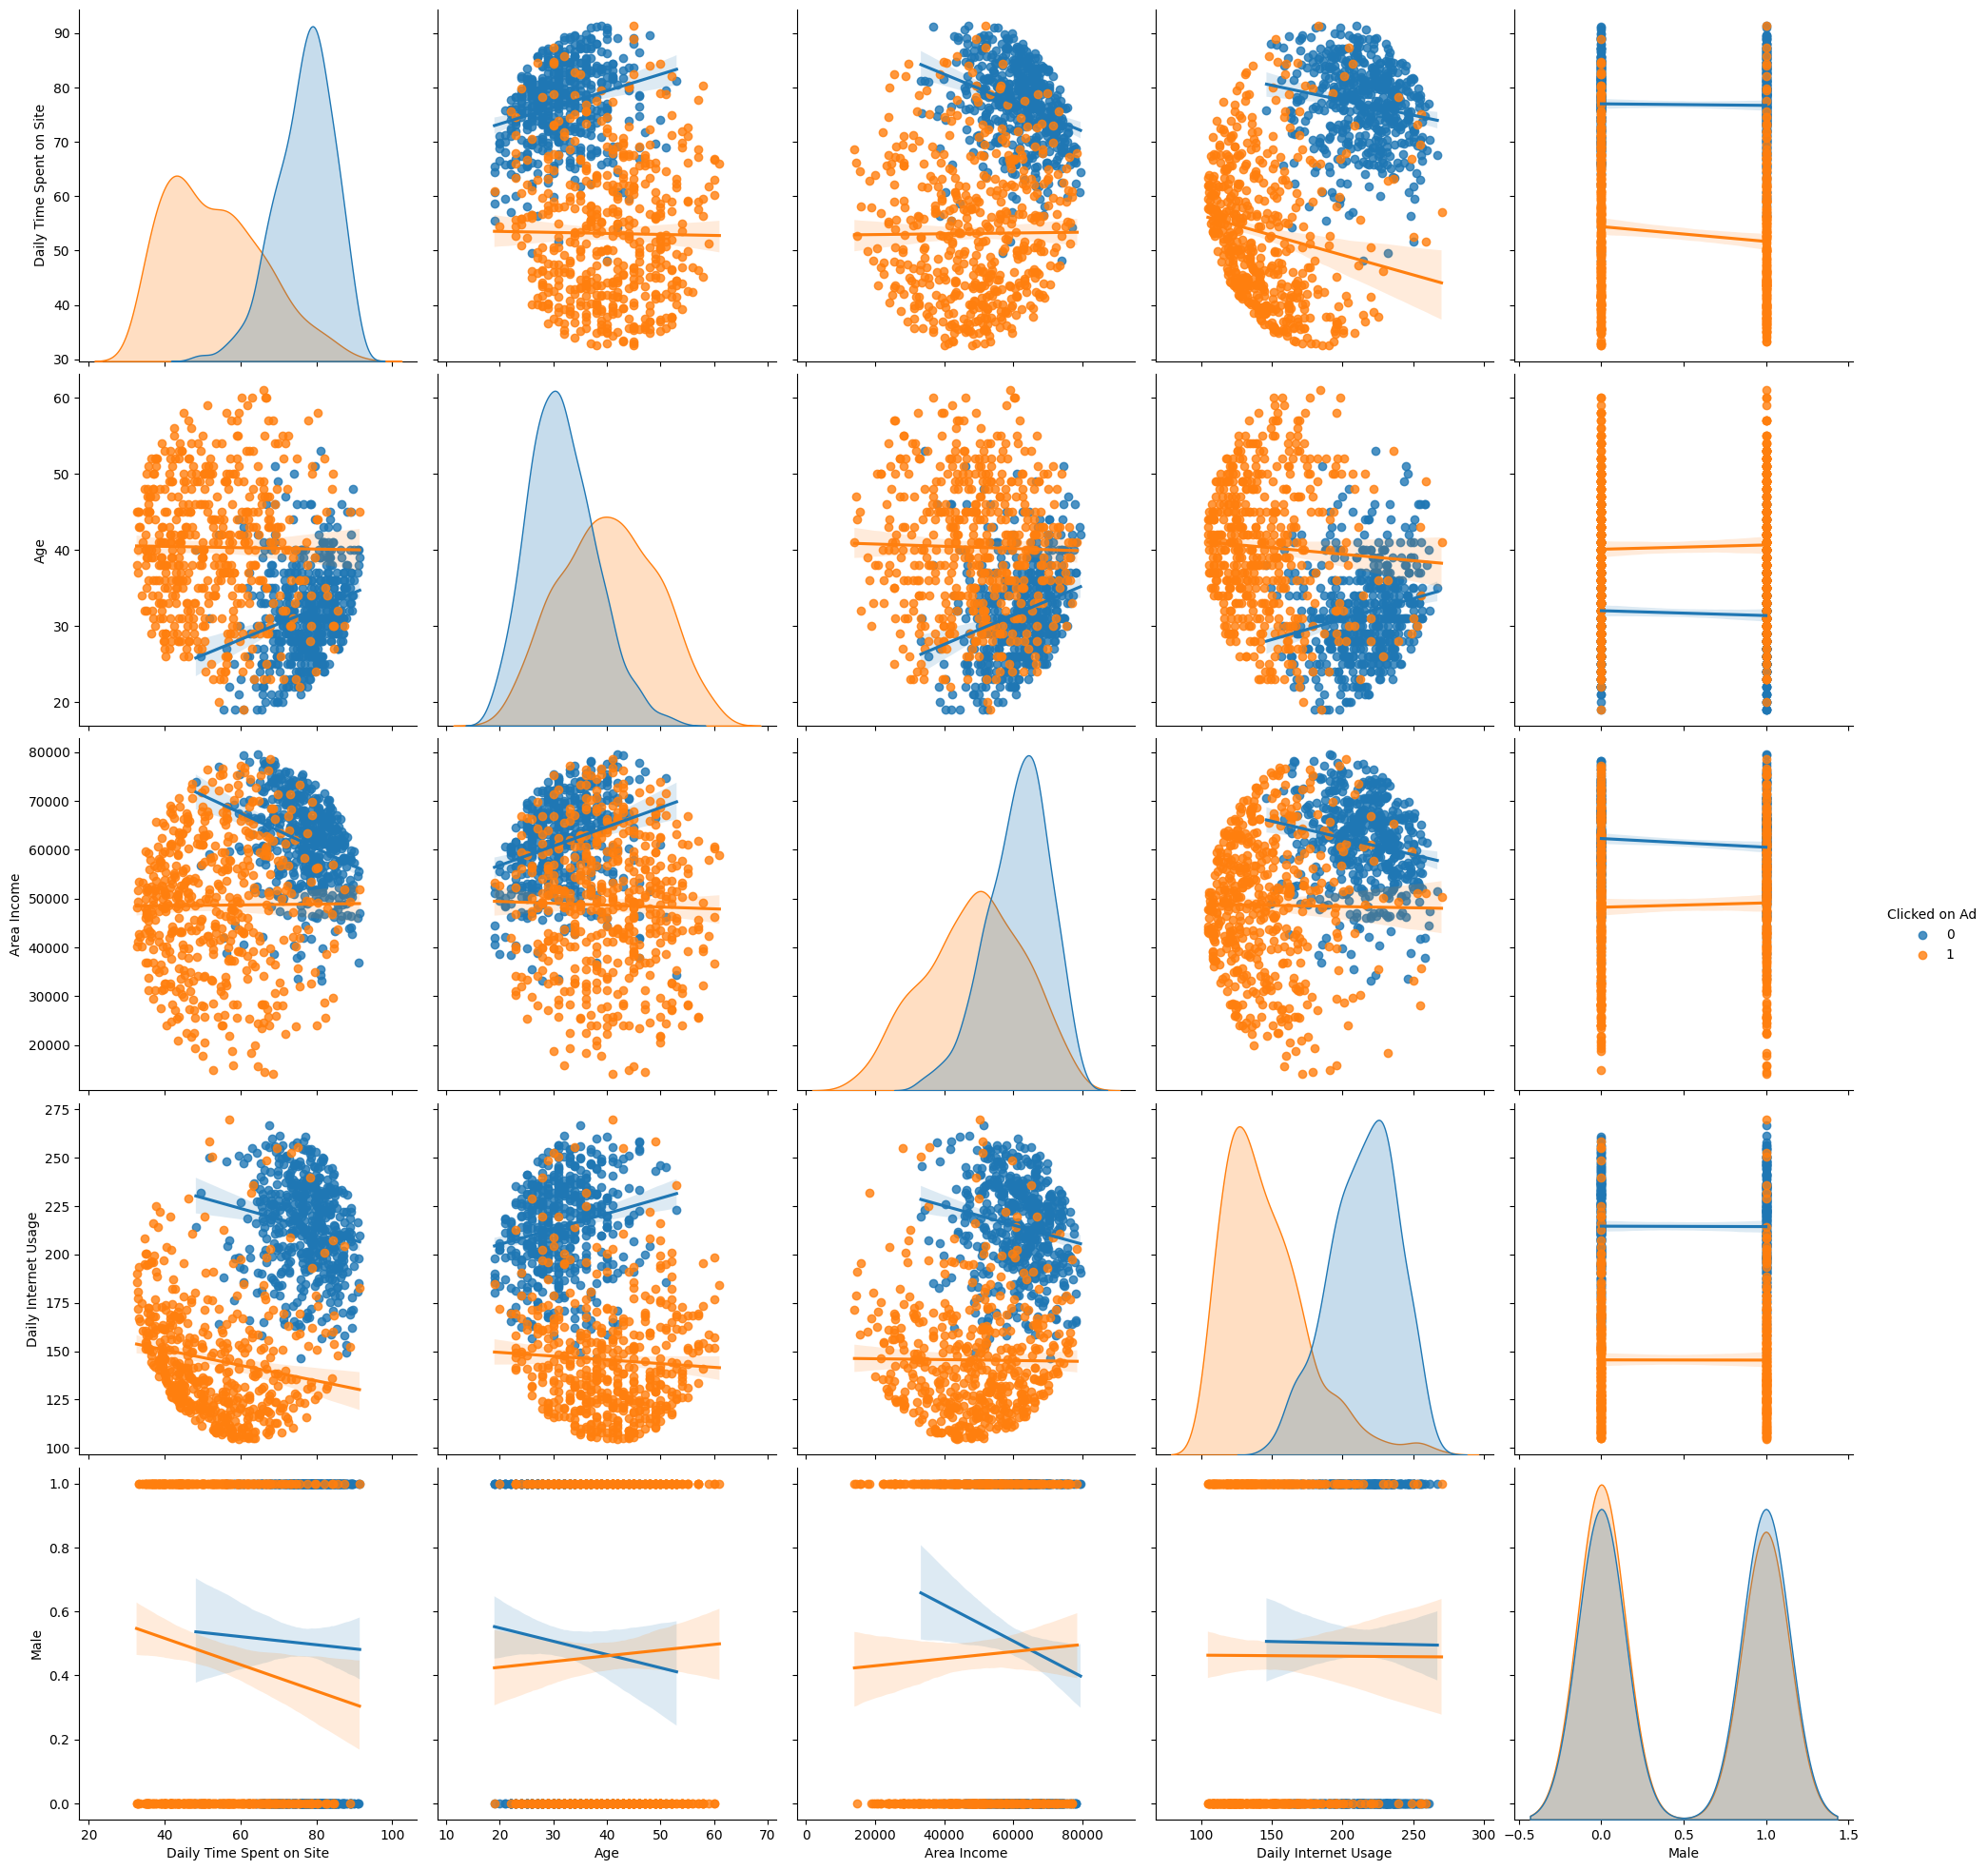

In [9]:
sns.pairplot(df.dropna(),
            hue='Clicked on Ad',
            height=4,
            vars=["Daily Time Spent on Site", "Age","Area Income","Daily Internet Usage", "Male"],
            kind='reg'); # "reg" de regresión lineal

# 2. Prepare Data for Logistic Regression


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [11]:
X = df.drop(columns=["Ad Topic Line", "City", "Country", "Timestamp", 'Clicked on Ad'])
y = df['Clicked on Ad']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
predictions = model.predict(X_test)
print(predictions)

[1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1]


In [16]:
model.score(X, y)

0.968

In [17]:
model.classes_

array([0, 1])

In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

# Step 4: Print the cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.9875 0.975  0.9875 0.9875 0.95   0.975  0.9375 0.95   0.9875 0.975 ]
Mean CV score: 0.9712500000000001


# 4. Evaluation


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
c_matrix = confusion_matrix(y_test, predictions)

In [21]:
print(c_matrix)

[[ 83   6]
 [  5 106]]


Text(50.722222222222214, 0.5, 'y_test')

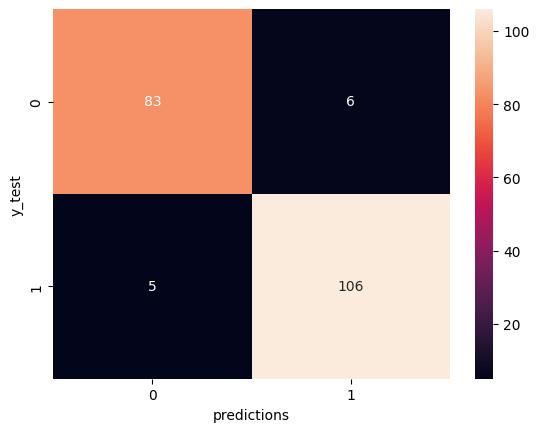

In [22]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True, fmt='d');
plt.xlabel('predictions')
plt.ylabel('y_test')

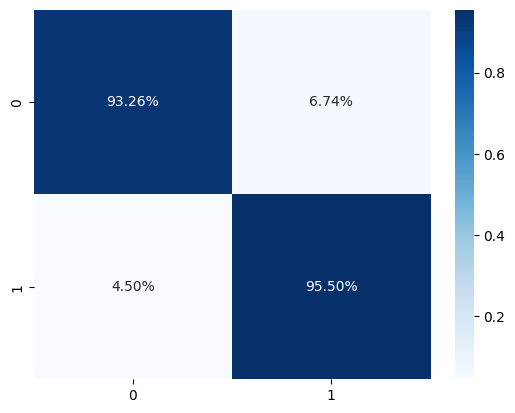

In [23]:
sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [24]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score

multilabel_confusion_matrix(y_test, predictions)

array([[[106,   5],
        [  6,  83]],

       [[ 83,   6],
        [  5, 106]]])

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

